In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [11]:
target = 'price_change'

train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index).sample(frac=1.0, random_state=1)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [12]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(hidden_layer_sizes=(20,20),
                    activation='logistic',
                    solver='adam',
                    batch_size=32,
                    learning_rate='constant',
                    learning_rate_init=0.01,
                    max_iter=100,
                    random_state=18)
modelo.fit(x_train, y_train)

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(20, 20),
              learning_rate_init=0.01, max_iter=100, random_state=18)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo.predict(x_test)

print("Accuracy: {:.4f}".format(accuracy_score(y_pred=y_pred, y_true=y_test)))
print("Precision: {:.4f}".format(precision_score(y_pred=y_pred, y_true=y_test)))
print("Recall: {:.4f}".format(recall_score(y_pred=y_pred, y_true=y_test)))
print("F1 Score: {:.4f}".format(f1_score(y_pred=y_pred, y_true=y_test)))

Accuracy: 0.7750
Precision: 0.6818
Recall: 0.8824
F1 Score: 0.7692


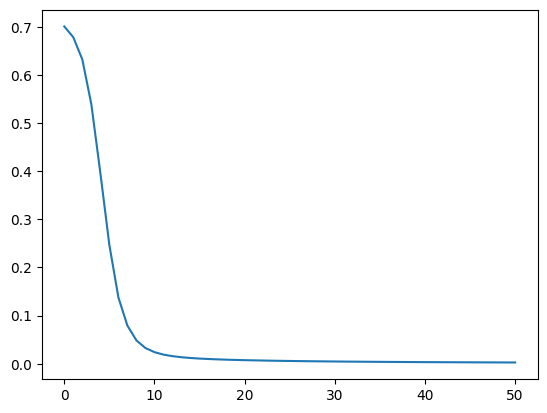

In [14]:
plt.plot(modelo.loss_curve_)

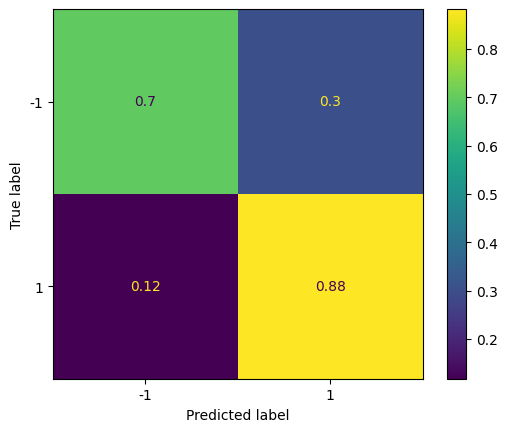

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')